<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.555369,87.808420,65.904061,-0.132900,235.134951,235.255477,-0.120527
1,0.0,1.0,34.422192,81.004175,40.647732,0.169017,166.243116,166.072746,0.170370
2,0.0,2.0,81.324892,87.050180,50.076621,0.146199,228.597891,228.440605,0.157285
3,0.0,3.0,50.475749,56.265269,68.926674,-0.388218,185.279474,185.671404,-0.391930
4,0.0,4.0,23.596257,91.826638,60.278796,0.914389,186.616079,185.694228,0.921851
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,71.165451,88.330535,72.565990,-0.886738,241.175238,242.074437,-0.899199
249996,999.0,246.0,80.815637,50.034602,97.446109,-1.002221,237.294127,238.155754,-0.861627
249997,999.0,247.0,30.254620,75.687974,45.996855,0.928605,162.868054,161.990418,0.877636
249998,999.0,248.0,47.540176,79.952080,91.693099,0.102821,229.288176,229.178607,0.109569


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.555369,87.808420,65.904061,-0.132900,235.134951,235.255477,-0.120527
1,0.0,1.0,34.422192,81.004175,40.647732,0.169017,166.243116,166.072746,0.170370
2,0.0,2.0,81.324892,87.050180,50.076621,0.146199,228.597891,228.440605,0.157285
3,0.0,3.0,50.475749,56.265269,68.926674,-0.388218,185.279474,185.671404,-0.391930
4,0.0,4.0,23.596257,91.826638,60.278796,0.914389,186.616079,185.694228,0.921851
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,71.165451,88.330535,72.565990,-0.886738,241.175238,242.074437,-0.899199
249996,999.0,246.0,80.815637,50.034602,97.446109,-1.002221,237.294127,238.155754,-0.861627
249997,999.0,247.0,30.254620,75.687974,45.996855,0.928605,162.868054,161.990418,0.877636
249998,999.0,248.0,47.540176,79.952080,91.693099,0.102821,229.288176,229.178607,0.109569


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.555369  87.808420  65.904061  ...  235.134951  235.255477 -0.120527
      1.0    34.422192  81.004175  40.647732  ...  166.243116  166.072746  0.170370
      2.0    81.324892  87.050180  50.076621  ...  228.597891  228.440605  0.157285
      3.0    50.475749  56.265269  68.926674  ...  185.279474  185.671404 -0.391930
      4.0    23.596257  91.826638  60.278796  ...  186.616079  185.694228  0.921851
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  71.165451  88.330535  72.565990  ...  241.175238  242.074437 -0.899199
      246.0  80.815637  50.034602  97.446109  ...  237.294127  238.155754 -0.861627
      247.0  30.254620  75.687974  45.996855  ...  162.868054  161.990418  0.877636
      248.0  47.540176  79.952080  91.693099  ...  229.288176  229.178607  0.109569
      249.0  74.782903  78.907218  85.540689  ...  249.629739  249.196587  0.433152

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.555369  87.808420  65.904061  ...  235.134951  235.255477 -0.120527
      1.0    34.422192  81.004175  40.647732  ...  166.243116  166.072746  0.170370
      2.0    81.324892  87.050180  50.076621  ...  228.597891  228.440605  0.157285
      3.0    50.475749  56.265269  68.926674  ...  185.279474  185.671404 -0.391930
      4.0    23.596257  91.826638  60.278796  ...  186.616079  185.694228  0.921851
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  71.165451  88.330535  72.565990  ...  241.175238  242.074437 -0.899199
      246.0  80.815637  50.034602  97.446109  ...  237.294127  238.155754 -0.861627
      247.0  30.254620  75.687974  45.996855  ...  162.868054  161.990418  0.877636
      248.0  47.540176  79.952080  91.693099  ...  229.288176  229.178607  0.109569
      249.0  74.782903  78.907218  85.540689  ...  249.629739  249.196587  0.433152

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.555369,87.808420,65.904061,-0.132900,235.134951,235.255477,-0.120527
1,0.0,1.0,34.422192,81.004175,40.647732,0.169017,166.243116,166.072746,0.170370
2,0.0,2.0,81.324892,87.050180,50.076621,0.146199,228.597891,228.440605,0.157285
3,0.0,3.0,50.475749,56.265269,68.926674,-0.388218,185.279474,185.671404,-0.391930
4,0.0,4.0,23.596257,91.826638,60.278796,0.914389,186.616079,185.694228,0.921851
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,71.165451,88.330535,72.565990,-0.886738,241.175238,242.074437,-0.899199
249996,999.0,246.0,80.815637,50.034602,97.446109,-1.002221,237.294127,238.155754,-0.861627
249997,999.0,247.0,30.254620,75.687974,45.996855,0.928605,162.868054,161.990418,0.877636
249998,999.0,248.0,47.540176,79.952080,91.693099,0.102821,229.288176,229.178607,0.109569


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.555369  87.808420  65.904061  ...  235.134951  235.255477 -0.120527
      1.0    34.422192  81.004175  40.647732  ...  166.243116  166.072746  0.170370
      2.0    81.324892  87.050180  50.076621  ...  228.597891  228.440605  0.157285
      3.0    50.475749  56.265269  68.926674  ...  185.279474  185.671404 -0.391930
      4.0    23.596257  91.826638  60.278796  ...  186.616079  185.694228  0.921851
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  71.165451  88.330535  72.565990  ...  241.175238  242.074437 -0.899199
      246.0  80.815637  50.034602  97.446109  ...  237.294127  238.155754 -0.861627
      247.0  30.254620  75.687974  45.996855  ...  162.868054  161.990418  0.877636
      248.0  47.540176  79.952080  91.693099  ...  229.288176  229.178607  0.109569
      249.0  74.782903  78.907218  85.540689  ...  249.629739  249.196587  0.433152

[250000 rows x 7 columns]

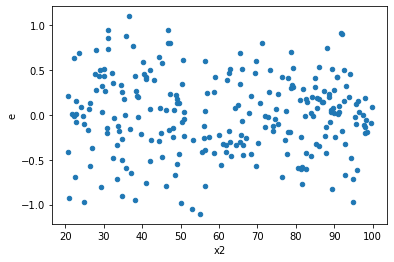

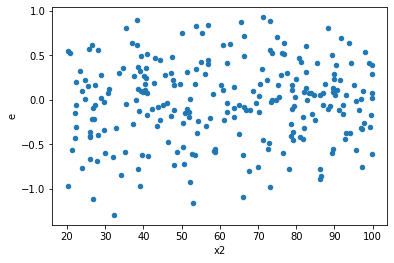

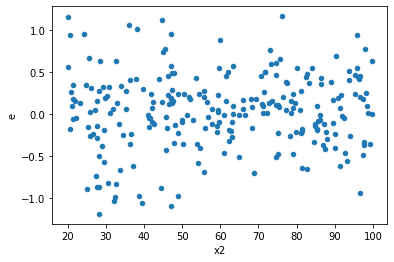

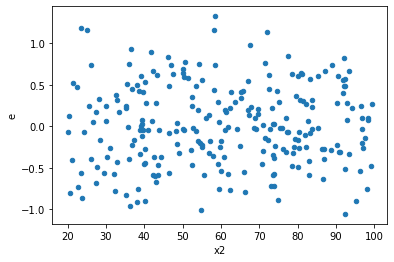

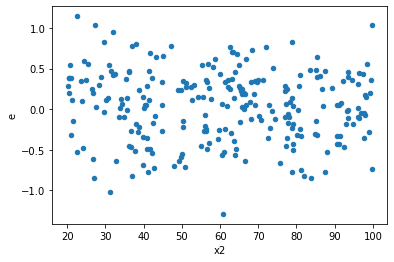

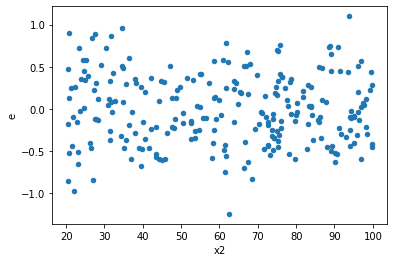

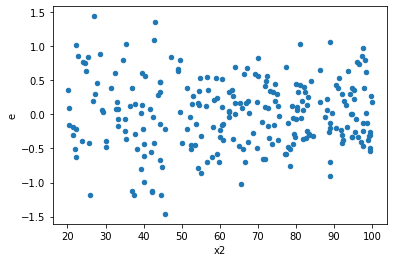

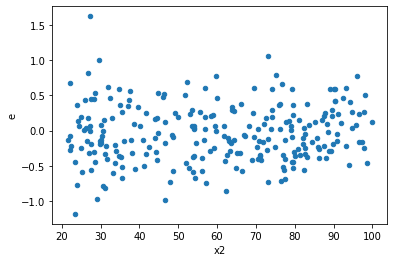

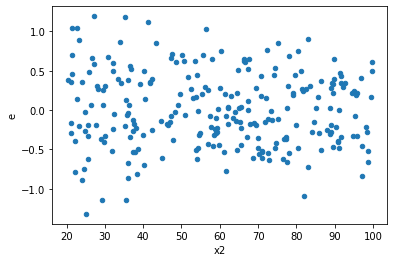

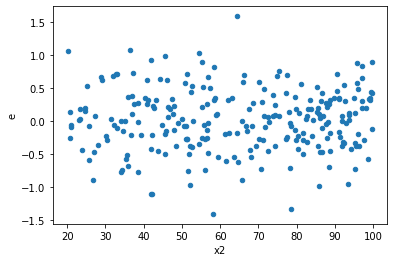

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
12.0,97.0,97.0,15.08379371222006,16.10298449221959,0.15550302796103155,0.16601014940432568,1.0675685970946314,0.7481192870615856,0.6259403564692072,0.3740596435307928,Reject001=1 : Homoscedasticity
37.0,97.0,97.0,19.61115000666481,20.965980071482484,0.20217680419242073,0.21614412444827302,1.0690846821505744,0.7428445985998331,0.6285777007000835,0.37142229929991655,Reject001=1 : Homoscedasticity
46.0,97.0,97.0,16.417726549019413,16.78341274605807,0.1692549128764888,0.17302487367070174,1.022273863311513,0.9138354490546918,0.5430822754726541,0.4569177245273459,Reject001=1 : Homoscedasticity
66.0,97.0,97.0,17.063048984771758,21.065148293591985,0.17590772149249234,0.2171664772535256,1.2345477242896026,0.30114685032508826,0.8494265748374559,0.15057342516254413,Reject001=1 : Homoscedasticity
110.0,97.0,97.0,24.489932306361645,24.915694397934654,0.25247352893156333,0.25686282884468714,1.0173851885847154,0.9325337187310918,0.5337331406344541,0.4662668593655459,Reject001=1 : Homoscedasticity
121.0,97.0,97.0,17.340171614345213,17.386115383345548,0.1787646558179919,0.1792383029210881,1.0026495567646128,0.9896303794181358,0.5051848102909321,0.4948151897090679,Reject001=1 : Homoscedasticity
129.0,97.0,97.0,19.829382816055215,20.207711262134605,0.2044266269696414,0.2083269202281918,1.0190791841374442,0.9260395729917559,0.5369802135041221,0.46301978649587794,Reject001=1 : Homoscedasticity
177.0,97.0,97.0,21.237034572397828,22.33157518906476,0.21893850074636936,0.23022242462953363,1.0515392397622938,0.8050418114859847,0.5974790942570076,0.4025209057429924,Reject001=1 : Homoscedasticity
184.0,97.0,97.0,16.450564399186863,18.992165202963285,0.16959344741429755,0.19579551755632252,1.1544993072640142,0.48059034628959596,0.759704826855202,0.24029517314479798,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,23.692582287772638,13.9551433295899,0.2442534256471406,0.14386745700608145,0.5890089632311598,0.009739103061461309,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,19.253000695240033,16.96457492155846,0.19848454324989726,0.17489252496452018,0.8811392670729322,0.5343860283992149,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,26.64945372520017,14.453854826801141,0.2747366363422698,0.14900881264743446,0.5423696476424706,0.002862276163804252,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,24.987034622397733,18.068042421603746,0.2575982950762653,0.1862684785732345,0.7230967057374635,0.11206193236360429,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,20.30970745367042,14.50027692947645,0.209378427357427,0.1494873910255304,0.7139579416667533,0.0987295814121945,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,17.566067838890408,13.52773283584047,0.18109348287515883,0.13946116325608732,0.7701059201132502,0.20009839343792374,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,35.44331535838697,16.960972194092136,0.365395003694711,0.17485538344424884,0.47853797035041346,0.00034306642290204167,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,20.711791694379173,12.845678137693557,0.21352362571524922,0.132429671522614,0.620210859941183,0.01952572561889508,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,28.635683196784004,18.033847441503266,0.2952132288328248,0.18591595300518832,0.6297683668859906,0.02374444724166583,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      808
Reject001=0 : Heteroscedasticity    192
Name: Result_test, dtype: int64